# Лабораторная работа 4

Деревья решений

Выполнил: 6133-010402D, Харитонов Никита Владимирович

In [1]:
!pip install palmerpenguins

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [2]:
data = load_penguins()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [3]:
# print unique values of categorical columns
for col in ['species', 'island', 'sex', 'year']:
  print(f'{col} = {data[col].unique()}')

species = ['Adelie' 'Gentoo' 'Chinstrap']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['male' 'female' nan]
year = [2007 2008 2009]


In [4]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальные колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`



In [5]:
data = pd.get_dummies(data)
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,2007,1,0,0,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)



In [6]:
data = load_penguins()

# delete rows with nan
data.dropna(inplace=True)

# split data into features (X) and targets (y)
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# normalize features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

cls = KNeighborsClassifier()
cls.fit(X_train_normalized, y_train)
cls.score(X_test_normalized, y_test)

0.9850746268656716

1.2. То же самое и использованием `sklearn.pipeline.Pipeline`



In [8]:
pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier()),])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9850746268656716

1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [9]:
param_grid = {
    'n_neighbors': list(range(1, 10))
}

# create and train grid search
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', refit='accuracy')
gs.fit(X_train, y_train)

print('best model:') 
print('parameter:', gs.best_params_)
print('score:', gs.best_score_)

best model:
parameter: {'n_neighbors': 1}
score: 0.8233618233618234



2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке




In [10]:
tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)



In [11]:
max_depth = [1, 5, 10, 15, 20, 25]
max_features  = [1, 5, 10, 15, 20, 25]
param_grid = {
    'max_depth': max_depth,
    'max_features': max_features 
}
scoring = ['accuracy']

# create and train grid search
gs = GridSearchCV(DecisionTreeClassifier(random_state=17), param_grid, cv=10, scoring=scoring, refit='accuracy')
gs.fit(X_train, y_train)

print('best model:') 
print('parameter:', gs.best_params_)
print('score:', gs.best_score_)

best model:
parameter: {'max_depth': 15, 'max_features': 1}
score: 0.9096866096866097


2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

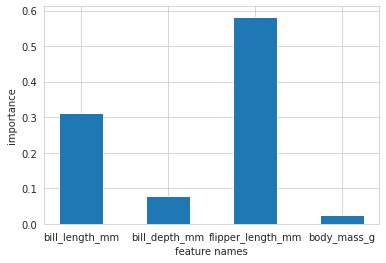

3 most important feautes:
flipper_length_mm
bill_length_mm
bill_depth_mm


In [12]:
best_tree = gs.best_estimator_
names = best_tree.feature_names_in_
importances = best_tree.feature_importances_
plt.bar(names, importances, width=0.5)
plt.xlabel('feature names')
plt.ylabel('importance')
plt.show()
names_importances_list = list(zip(names, importances))
names_importances_list.sort(key=lambda x: x[1], reverse=True)

print('3 most important feautes:')

for item in names_importances_list[:3]:
  print(item[0])

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`



In [13]:
forest = RandomForestClassifier(random_state=17)

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9701492537313433

3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


In [14]:
max_depth = [1, 5, 10, 15, 20, 25]
param_grid = {
    'max_depth': max_depth
}
scoring = ['accuracy']

# create and train grid search
gs_forest = GridSearchCV(RandomForestClassifier(random_state=17), param_grid, cv=10, scoring=scoring, refit='accuracy')
gs_forest.fit(X_train, y_train)

print('best model:') 
print('parameter:', gs_forest.best_params_)
print('score:', gs_forest.best_score_)

best model:
parameter: {'max_depth': 5}
score: 0.9696581196581195


4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [15]:
'''
Таким образом, можно сделать вывод, случайный лес с гиперпраметром максимальной глубины, равной 5, дал наилучший результат, равный 0.9696581196581195.
'''

'\nТаким образом, можно сделать вывод, случайный лес с гиперпраметром максимальной глубины, равной 10, дал наилучший результат, равный 0.9696581196581195\n'